
# Loan Interest Rate Prediction

### By regression method of supervised learning

In [2]:
#[csv file]
#https://www.kaggle.com/wendykan/lending-club-loan-data/version/1

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# If size of file is huge then it is possible to load limited row 
# skiprows=1000 will skip first 1000 rows (optional)
# nrow will load 1000 rows only
loan_data = pd.read_csv('loan.csv', index_col=0, nrows=1000)

In [3]:
#loan_data.index

In [4]:
#loan_data.shape

In [5]:
#loan amount
#loan_data.loan_amnt[0:10]

In [6]:
# First ten entries of 'term' column
# NOTE: Should remove 'months' string while training model
#loan_data.term[0:10] 

#OR
#loan_data.iloc[0:10, 4]
#OR
#loan_data['term'][0:10]

In [7]:
# ten Interest rate enteries here
# NOTE: Should remove the floating point numbers to train model
#loan_data.int_rate[0:10]

In [8]:
# ten grade enteries
#loan_data['grade'][0:10]

In [9]:
# ten grade enteries
#loan_data['sub_grade'][0:10]

### Data cleaning

In [10]:
# 1. Remove 'months' string in [term] column
loan_period = loan_data['term'].map(lambda x : x.rstrip(' months'))

In [11]:
# 2. Remove floating point number from interest rate column
interest_rate = loan_data['int_rate'].astype(int)
interest_rate

id
1077501    10
1077430    15
1077175    15
1076863    13
1075358    12
1075269     7
1069639    15
1072053    18
1071795    21
1071570    12
1070078    14
1069908    12
1064687    13
1069866     9
1069057    10
1069759    16
1065775    15
1069971     6
1062474    11
1069742     6
1069740    15
1039153    12
1069710    11
1069700    11
1069559    11
1069697     9
1069800    14
1069657    16
1069799    11
1047704    11
           ..
1054408    20
1058173    16
1057996     9
1058162    14
1055265    10
1018385     6
1054294    15
1057750    12
1057923     9
1057816    11
1057900     8
1056770    12
1057710    11
1057323    16
1057878    12
1057726    12
1057720    18
1049053    14
1057448    19
1057669    21
1050535    16
1057674    15
1057806    10
1057615     8
1057818     8
1057629    15
1057621     9
1057787     9
1057770    20
1057275    17
Name: int_rate, Length: 1000, dtype: int64

In [12]:
#print(loan_data['grade'].astype('category').values, "\n")
#print(loan_data['sub_grade'].astype('category').values)

In [47]:
# 3. Encode grade and subgrade columns into integer form
fico_grade = loan_data['grade'].replace(('A', 'B', 'C', 'D', 'E', 'F', 'G'), (1,2,3,4,5,6, 7))
fico_sub_grade = loan_data['sub_grade'].replace(('A1','A2', 'A3', 'A4', 'A5', 'A6', 'A7',
                                                          'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7',
                                                          'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7',
                                                          'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7',
                                                          'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7',
                                                          'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7',
                                                          'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7',),
                                                          ('11','12','13','14','15','16','17',
                                                           '21','22','23','24','25','26','27',
                                                           '31','32','33','34','35','36','37',
                                                           '41','42','43','44','45','46','47',
                                                           '51','52','53','54','55','56','57',
                                                           '61','62','63','64','65','66','67',
                                                           '71','72','73','74','75','76','77',
                                                          )
                                                        )

In [14]:
# 4. Store cleaned data into a dataframe
df = pd.DataFrame()
df['Loan Amount'] = loan_data.loan_amnt
df['Loan Period'] = loan_period
df['Interest Rate'] = interest_rate
df['FICO Grade'] = fico_grade
df['FICO Subgrade'] = fico_sub_grade
df.head()

,Loan Amount,Loan Period,Interest Rate,FICO Grade,FICO Subgrade
id,,,,,
1077501,5000.0,36,10,2,22
1077430,2500.0,60,15,3,34
1077175,2400.0,36,15,3,35
1076863,10000.0,36,13,3,31
1075358,3000.0,60,12,2,25


### Data Visualization

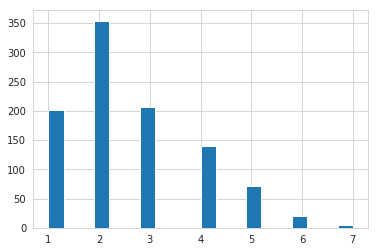

In [15]:
# 1. Histogram of FICO grade 
plt.figure()
fico = df['FICO Grade']
fico.hist(bins=20)

In [ ]:
"""How to read histogram:
    Histograme is distribution of single variable. It shows 'how many time a variable is repeated' that is 
    probability distribution of a variable. For example in above graph fico grade '2' is repeated 350 time
    in entire distribution"""

Text(0.5, 1.0, '')

<Figure size 432x288 with 0 Axes>

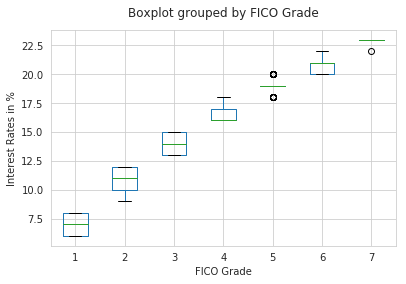

In [16]:
# 2. Box plot
plt.figure()
x = df.boxplot('Interest Rate', 'FICO Grade')
#x.set_xticklabels(['2', ' ', '4', ' ', '6', ' ', '8']) # This will set spacing on x-axis
x.set_xlabel('FICO Grade')
x.set_ylabel('Interest Rates in %')
x.set_title('')

In [ ]:
"""From Boxplot low fico grade turn out to be better since interest rate will be low.
Example: For fico_grade=2, interest rate range between  approx 9%-12% and median is approx 11%."""

/home/uib14108/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7ec52a6d30>,
      dtype=object)

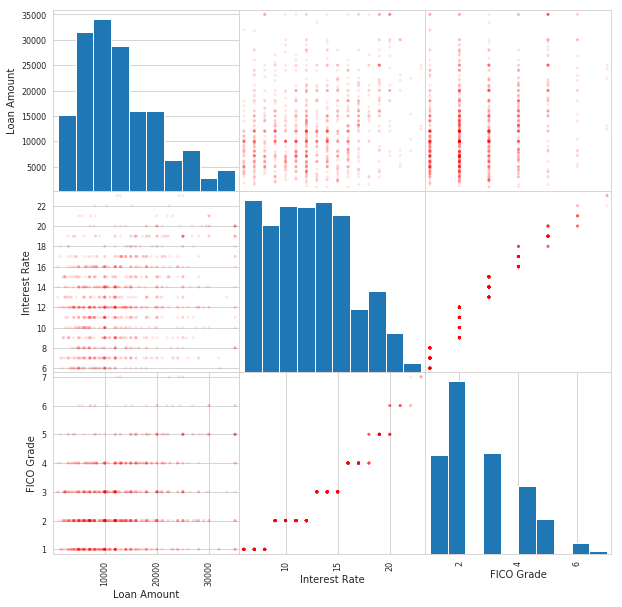

In [17]:
# 3. Scatterplot matrix
pd.scatter_matrix(df, alpha=0.1,color='red', figsize=(10,10), diagonal = 'hist') # alpha is tranperancy between 0-1

In [ ]:
"""scatter plot matrix tell about what are the factors influencing interest rates range with respect to fico
grades as shown in box plot. Compare interest rate matrix wrt loan amount & fico grade. If loan amount and fico
grade also good (low) then interest rate will also be low. Interest rate has linear relationship with loan amount
and fico grade. Here more than one variable effects interest rate so multivariate linear regression next."""

In [18]:
# TODO: multivariate linear regression analysis
# 1. Build ordinary least square linear regression using statsmodel.
# 2. Find r-square for statsmodel
# 3. Build linear regression model using scikit learn
# 4. Find RMSE for scikit learn model
# 5. compare two models

In [19]:
import statsmodels.api as sm

In [20]:
int_rate = df['Interest Rate']
loan_amount = df['Loan Amount']
fico_grade = df['FICO Grade']
int_rate

id
1077501    10
1077430    15
1077175    15
1076863    13
1075358    12
1075269     7
1069639    15
1072053    18
1071795    21
1071570    12
1070078    14
1069908    12
1064687    13
1069866     9
1069057    10
1069759    16
1065775    15
1069971     6
1062474    11
1069742     6
1069740    15
1039153    12
1069710    11
1069700    11
1069559    11
1069697     9
1069800    14
1069657    16
1069799    11
1047704    11
           ..
1054408    20
1058173    16
1057996     9
1058162    14
1055265    10
1018385     6
1054294    15
1057750    12
1057923     9
1057816    11
1057900     8
1056770    12
1057710    11
1057323    16
1057878    12
1057726    12
1057720    18
1049053    14
1057448    19
1057669    21
1050535    16
1057674    15
1057806    10
1057615     8
1057818     8
1057629    15
1057621     9
1057787     9
1057770    20
1057275    17
Name: Interest Rate, Length: 1000, dtype: int64

In [21]:
# Convert panda series to columns (array format)
y = np.matrix(int_rate).transpose() # Response variable
x1 = np.matrix(fico_grade).transpose() # explanatory variable 1
x2 = np.matrix(loan_amount).transpose() # expanatory variable 2

In [22]:
# Join two explanatory variable into single matrix
x = np.column_stack([x1, x2])
x

matrix([[2.0000e+00, 5.0000e+03],
        [3.0000e+00, 2.5000e+03],
        [3.0000e+00, 2.4000e+03],
        ...,
        [2.0000e+00, 1.2375e+04],
        [5.0000e+00, 3.5000e+04],
        [4.0000e+00, 1.4000e+04]])

In [23]:
# add a column to input dataset matrix
# OLS model is linear regression model in statistics.
x3 = sm.add_constant(x)

In [24]:
model = sm.OLS(y, x3)

In [25]:
model_fit = model.fit()

In [26]:
print("The probability values: ", model_fit.pvalues)
print("The R-squared value is: ", model_fit.rsquared) # It is determinant of co-efficient matrix
# R-squared can be calculated using scikit learm module as well:
# R^2 =  1-(SSres/SStotal)

The probability values:  [3.76239882e-318 0.00000000e+000 5.29445444e-001]
The R-squared value is:  0.9336244145239008


In [27]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     7012.
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        22:12:11   Log-Likelihood:                -1441.4
No. Observations:                1000   AIC:                             2889.
Df Residuals:                     997   BIC:                             2904.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6924      0.082     57.377      0.000       4.532       4.853
x1             2.9334      0.026    113.172      0.000       2.883       2.984
x2          2.855e-06   4.54e-06      0.629      0.529   -6.05e-06    1.18e-05
==============================================================================
Omnibus:                       99.716   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.008
Skew:                          -0.154   Prob(JB):                     6.80e-08
Kurtosis:                       2.165   Cond. No.                     3.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# predicted values of interest rates
prediction_1 = model_fit.predict()
predn = np.matrix(prediction_1).transpose()

In [29]:
prediction_1.shape

(1000,)

In [30]:
prediction_1[0] # interest rate predicted for first loaner

10.57348288184507

In [31]:
predn[1][0]

matrix([[13.49976167]])

In [32]:
# Linear Regression using sklearn.model

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [34]:
feature = [
    'Loan Amount',
    'Loan Period',
    'FICO Grade',
    'FICO Subgrade',
]

X = df[feature]
y = df['Interest Rate']

In [35]:
y

id
1077501    10
1077430    15
1077175    15
1076863    13
1075358    12
1075269     7
1069639    15
1072053    18
1071795    21
1071570    12
1070078    14
1069908    12
1064687    13
1069866     9
1069057    10
1069759    16
1065775    15
1069971     6
1062474    11
1069742     6
1069740    15
1039153    12
1069710    11
1069700    11
1069559    11
1069697     9
1069800    14
1069657    16
1069799    11
1047704    11
           ..
1054408    20
1058173    16
1057996     9
1058162    14
1055265    10
1018385     6
1054294    15
1057750    12
1057923     9
1057816    11
1057900     8
1056770    12
1057710    11
1057323    16
1057878    12
1057726    12
1057720    18
1049053    14
1057448    19
1057669    21
1050535    16
1057674    15
1057806    10
1057615     8
1057818     8
1057629    15
1057621     9
1057787     9
1057770    20
1057275    17
Name: Interest Rate, Length: 1000, dtype: int64

In [36]:
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=7)

In [37]:
model = LinearRegression()

In [38]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [39]:
prediction_2 = model.predict(X_test)

In [40]:
prediction_2[0]

9.441241045844258

In [41]:
# RMSE

In [42]:
from sklearn import metrics
mean_sq_error = metrics.mean_squared_error(y_test, prediction_2)

In [43]:
rmse = np.sqrt(mean_sq_error)

In [44]:
rmse

0.6378048144894384